# <font color='black'><center><center></font> 
![title](img/All.png) 
# <font color='white'><center><center></font> 
# <font><center>Neural Networks & Deep Learning<center></font>
# <font ><center>HW3: Q2<center></font>
## <center>Teacher: Dr. Kalhor<center>
### <center>Mohammadali Shakerdargah <center>
### <center>810196487<center>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import statistics

In [21]:
class AutoAssociativeNet:
    def __init__(self, _S, _T):
        self.S = _S
        self.T = _T
        self.W = -100 * np.eye(N)
        
    def train(self):
        for trainSample in range(len(self.S)):
            x = self.S[trainSample]
            y = self.T[trainSample]
            for i in range(len(x)):
                for j in range(len(y)):
                    self.W[i][j] = self.W[i][j] + x[i]*y[j]
            
    def showResultWithNoise(self, _S_space, _T_space, n): # n% of values with noise
        T_space = copy.deepcopy(_T_space)
        identicals = []
        for i in range(30):
            S_space = copy.deepcopy(_S_space)
            for sample in range(len(S_space)):
                toNoise = int(len(S_space[0])*(n/100))
                randomIndexes = random.sample(range(1, len(S_space[0])), toNoise)
                for index in randomIndexes:
                    if(S_space[sample][index] == 1):
                        S_space[sample][index] = -1
                    else:
                        S_space[sample][index] = 1
            Y_t_list = []
            for sample in range(len(S_space)):
                y_t_sample = np.dot(S_space[sample] ,self.W)
                for i in range(len(y_t_sample)): #sign
                    if(y_t_sample[i] >= 0):
                        y_t_sample[i] = 1
                    else:
                        y_t_sample[i] = -1
                Y_t_list.append(y_t_sample)
            Y_t_array = np.array(Y_t_list)
            identical = 0
            for k in range(len(Y_t_array)):
                for l in range(len(Y_t_array[0])):
                    if(Y_t_array[k][l] == T_space[k][l] ):
                        identical += 1
            identicals.append(identical)
        accuracy = (((sum(identicals)/30)/(len(Y_t_array)*len(Y_t_array[0]))))*100
        mean = statistics.mean(identicals)
        std = statistics.stdev(identicals)
        return accuracy, mean, std
    

In [22]:
N = 100
R_rates = [10,20,30,40,50,60,70,80,90,100]
E = [0, 20, 40]

accuracy_E0 = []
mean_E0 = []
std_E0 = []
accuracy_E20 = []
mean_E20 = []
std_E20 = []
accuracy_E40 = []
mean_E40 = []
std_E40 = []

for error in E:
    for rate in R_rates:
        S_list = []
        for i in range(rate):
            s=[]
            for j in range(N):
                randomNum = random.random()
                if( randomNum >= 0.5):
                    s.append(1)
                else:
                    s.append(-1)
            S_list.append(s)
        S_array = np.array(copy.deepcopy(S_list))
        AANet = AutoAssociativeNet(copy.deepcopy(S_array), copy.deepcopy(S_array))
        AANet.train()
        accuracy, mean, std = AANet.showResultWithNoise(copy.deepcopy(S_array),copy.deepcopy(S_array), error)
        if(error==0):
            accuracy_E0.append(accuracy)       
            mean_E0.append(mean)
            std_E0.append(std)
        elif(error==20):
            accuracy_E20.append(accuracy)       
            mean_E20.append(mean)
            std_E20.append(std)          
        else:
            accuracy_E40.append(accuracy)       
            mean_E40.append(mean)
            std_E40.append(std)           

# Part A

In [23]:
print("Accuracy with 0% noise:",accuracy_E0)
print("Accuracy with 20% noise:",accuracy_E20)
print("Accuracy with 40% noise:",accuracy_E40)

Accuracy with 0% noise: [60.099999999999994, 68.89999999999999, 71.03333333333333, 73.5, 76.16000000000001, 78.25, 80.37142857142857, 81.675, 82.77777777777777, 83.67999999999999]
Accuracy with 20% noise: [32.663333333333334, 46.99166666666667, 54.681111111111115, 58.53583333333333, 63.77, 66.27388888888889, 68.62238095238095, 70.07666666666667, 71.77703703703703, 72.637]
Accuracy with 40% noise: [40.55666666666667, 44.56666666666667, 48.507777777777775, 51.545833333333334, 53.24399999999999, 55.00333333333332, 56.069047619047616, 56.705416666666665, 57.237037037037034, 58.013000000000005]


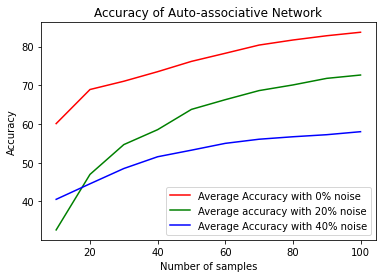

In [28]:
plt.plot(R_rates, accuracy_E0, color='r', label='Average Accuracy with 0% noise')
plt.plot(R_rates, accuracy_E20, color='g', label='Average accuracy with 20% noise')
plt.plot(R_rates, accuracy_E40, color='b', label='Average Accuracy with 40% noise')
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.title("Accuracy of Auto-associative Network")
plt.legend()
plt.show()

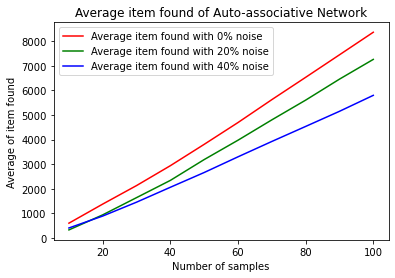

In [30]:
plt.plot(R_rates, mean_E0, color='r', label='Average item found with 0% noise')
plt.plot(R_rates, mean_E20, color='g', label='Average item found with 20% noise')
plt.plot(R_rates, mean_E40, color='b', label='Average item found with 40% noise')
plt.xlabel("Number of samples")
plt.ylabel("Average of item found")
plt.title("Average item found of Auto-associative Network")
plt.legend()
plt.show()

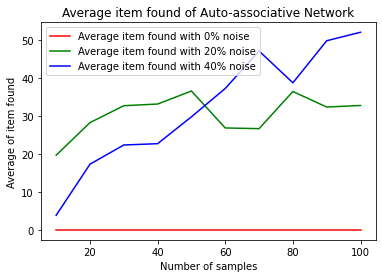

In [31]:
plt.plot(R_rates, std_E0, color='r', label='Average item found with 0% noise')
plt.plot(R_rates, std_E20, color='g', label='Average item found with 20% noise')
plt.plot(R_rates, std_E40, color='b', label='Average item found with 40% noise')
plt.xlabel("Number of samples")
plt.ylabel("Average of item found")
plt.title("Average item found of Auto-associative Network")
plt.legend()
plt.show()